## Adult Census Income
- Predict whether income exceeds $50K/yr based on census data

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset

In [5]:
adult = pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- age: the age of an individual
- workclass: a general term to represent the employment status of an individual
- fnlwgt: final weight. This is the number of people the census believes the entry represents..
- education: the highest level of education achieved by an individual.
- education-­num: the highest level of education achieved in numerical form.
- marital­status: marital status of an individual.
- occupation: the general type of occupation of an individual
- relationship: represents what this individual is relative to others.
- race: Descriptions of an individual’s race
- sex: the sex of the individual
- capital­gain: capital gains for an individual
- capital­loss: capital loss for an individual
- hours-­per-­week: the hours an individual has reported to work per week
- native­country: country of origin for an individual

In [6]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adult.describe(include='number').round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [8]:
adult.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
adult.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
adult.shape

(32561, 15)

### Data Preprocessing

In [11]:
adult.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [12]:
adult.duplicated().sum()

24

In [13]:
adult[adult.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [14]:
adult.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [15]:
adult.columns = adult.columns.str.strip().str.lower()

In [16]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
adult['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [18]:
adult['age'].min(), adult['age'].max(), adult['age'].mean(), adult['age'].median()

(17, 90, 38.58164675532078, 37.0)

In [19]:
adult['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
adult['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [21]:
adult['workclass'] = adult['workclass'].str.strip()

In [22]:
adult['workclass'] = adult['workclass'].str.replace('?', 'other')

In [23]:
adult['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [24]:
adult.shape

(32561, 15)

In [25]:
adult['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [26]:
# fnlwgt contains very high amount of unique values

print(adult['fnlwgt'].nunique()/ adult.shape[0] * 100, '%')

66.48444458094039 %


In [27]:
adult['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
adult['education'] = adult['education'].str.strip()

In [29]:
adult['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [30]:
# 

adult['education'] = adult['education'].str.replace('1st-4th', 'Primary Education')
adult['education'] = adult['education'].str.replace('5th-6th', 'Primary Education')
adult['education'] = adult['education'].str.replace('7th-8th', 'Lower Secondary Education')
adult['education'] = adult['education'].str.replace('9th', 'Lower Secondary Education')
adult['education'] = adult['education'].str.replace('10th', 'Upper Secondary Education')
adult['education'] = adult['education'].str.replace('11th', 'Upper Secondary Education')
adult['education'] = adult['education'].str.replace('12th', 'Upper Secondary Education')
adult['education'] = adult['education'].str.replace('HS-grad', 'High School Graduation')
adult['education'] = adult['education'].str.replace('Assoc-voc', 'Associate')
adult['education'] = adult['education'].str.replace('Assoc-acdm', 'Associate')
adult['education'] = adult['education'].str.replace('Bachelors', 'Bachelors')
adult['education'] = adult['education'].str.replace('Some-college', 'Bachelors')


In [31]:
adult['education'].value_counts()

education
Bachelors                    12646
High School Graduation       10501
Upper Secondary Education     2541
Associate                     2449
Masters                       1723
Lower Secondary Education     1160
Prof-school                    576
Primary Education              501
Doctorate                      413
Preschool                       51
Name: count, dtype: int64

In [128]:
adult['education-num'] = adult['education'].map({
    'Preschool': 1,
    'Primary Education': 2,
    'Lower Secondary Education': 3,
    'Upper Secondary Education': 4,
    'High School Graduation': 5,
    'Prof-school': 6,
    'Associate': 7,
    'Bachelors': 8,
    'Masters': 9,  
    'Doctorate': 10
})

In [129]:
adult['education-num'].value_counts()

education-num
8     12646
5     10501
4      2541
7      2449
9      1723
3      1160
6       576
2       501
10      413
1        51
Name: count, dtype: int64

In [34]:
adult['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [35]:
adult['marital-status'] = adult['marital-status'].str.strip()

In [36]:
adult['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [37]:
adult['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [38]:
adult['occupation'] = adult['occupation'].str.strip()

In [39]:
adult['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [40]:
adult['occupation'] = adult['occupation'].str.replace('?', 'Unknown-Occupation')

In [41]:
adult['occupation'].value_counts()

occupation
Prof-specialty        4140
Craft-repair          4099
Exec-managerial       4066
Adm-clerical          3770
Sales                 3650
Other-service         3295
Machine-op-inspct     2002
Unknown-Occupation    1843
Transport-moving      1597
Handlers-cleaners     1370
Farming-fishing        994
Tech-support           928
Protective-serv        649
Priv-house-serv        149
Armed-Forces             9
Name: count, dtype: int64

In [42]:
adult['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [43]:
adult['relationship'] = adult['relationship'].str.strip()

In [44]:
adult['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [45]:
adult['relationship'] = adult['relationship'].str.replace('Husband', 'Married')
adult['relationship'] = adult['relationship'].str.replace('Wife', 'Married')

In [46]:
adult['relationship'].value_counts()

relationship
Married           14761
Not-in-family      8305
Own-child          5068
Unmarried          3446
Other-relative      981
Name: count, dtype: int64

In [47]:
adult['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [48]:
adult['race'] = adult['race'].str.strip()

In [49]:
adult['race'] = adult['race'].str.replace('Asian-Pac-Islander', 'Asian')
adult['race'] = adult['race'].str.replace('Amer-Indian-Eskimo', 'Indian-Eskimo')

In [50]:
adult['race'].value_counts()

race
White            27816
Black             3124
Asian             1039
Indian-Eskimo      311
Other              271
Name: count, dtype: int64

In [51]:
adult['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [52]:
adult['sex'] = adult['sex'].str.strip()

In [53]:
adult['capital-gain'].nunique()

119

In [54]:
adult['capital-loss'].nunique()

92

In [55]:
# % of Capital loss relative to capital gain

print((adult['capital-loss'].nunique()/ adult['capital-gain'].nunique() * 100).__round__(3), '%')

77.311 %


In [56]:
adult['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [57]:
adult['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [58]:
adult['native-country'] = adult['native-country'].str.strip()

In [59]:
adult['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [60]:
adult['native-country'] = adult['native-country'].str.replace('?', 'other')
adult['native-country'] = adult['native-country'].str.replace('South', 'other')
adult['native-country'] = adult['native-country'].str.replace('Outlying-US(Guam-USVI-etc)', 'United-States Minor Outlying Islands')
adult['native-country'] = adult['native-country'].str.replace('Trinadad&Tobago', 'Trinidad and Tobago')
adult['native-country'] = adult['native-country'].str.replace('Hong', 'Hong Kong') 
adult['native-country'] = adult['native-country'].str.replace('Holand-Netherlands', 'Netherlands') 

In [61]:
adult['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'other', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'United-States Minor Outlying Islands', 'Scotland',
       'Trinidad and Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong Kong', 'Ireland', 'Hungary', 'Netherlands'], dtype=object)

In [62]:
adult['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [63]:
adult['income'] = adult['income'].str.strip()

In [64]:
adult['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [65]:
# CHECK: Percentage of '%' at each column

for col in adult.columns:
    print((col, len(adult[adult[col] == '?'])/len(adult[col])*100))

('age', 0.0)
('workclass', 0.0)
('fnlwgt', 0.0)
('education', 0.0)
('education-num', 0.0)
('marital-status', 0.0)
('occupation', 0.0)
('relationship', 0.0)
('race', 0.0)
('sex', 0.0)
('capital-gain', 0.0)
('capital-loss', 0.0)
('hours-per-week', 0.0)
('native-country', 0.0)
('income', 0.0)


### Exploratory Data Analysis

In [66]:
adult.dtypes[adult.dtypes == 'object'].index

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [67]:
adult.dtypes[adult.dtypes != 'object'].index

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

#####  Numeric Features EDA

- Age

In [68]:
# Right Skewed Distribution
adult['age'].mean(), adult['age'].median() 

(38.58164675532078, 37.0)

<Figure size 3000x500 with 0 Axes>

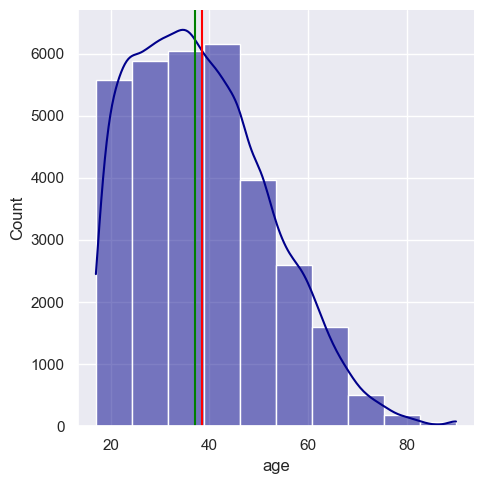

In [69]:
plt.figure(figsize=(30,5))
sns.displot(adult['age'], kde=True, color='darkblue', bins=10)

# Show mean and median on the plot (make it interactive using plotly)
plt.axvline(x=adult['age'].mean(), color='red')
plt.axvline(x=adult['age'].median(), color='green')

- fnlwgt (final weight) 

In [70]:
adult['fnlwgt'].mean(), adult['fnlwgt'].median()

(189778.36651208502, 178356.0)

<Figure size 3000x500 with 0 Axes>

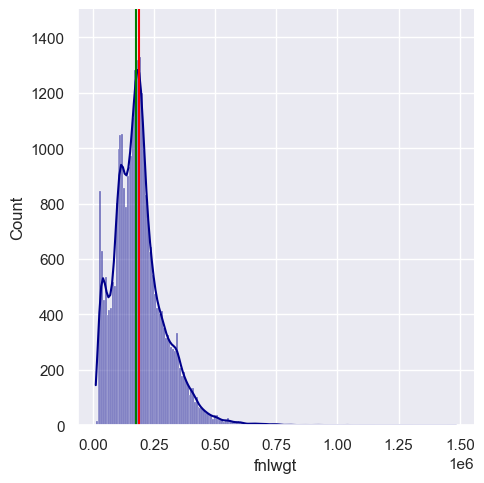

In [71]:
plt.figure(figsize=(30,5))
sns.displot(adult['fnlwgt'], kde=True, color='darkblue')

# Show mean and median on the plot
plt.axvline(x=adult['fnlwgt'].mean(), color='red')
plt.axvline(x=adult['fnlwgt'].median(), color='green')

- Education-num

<Figure size 3000x500 with 0 Axes>

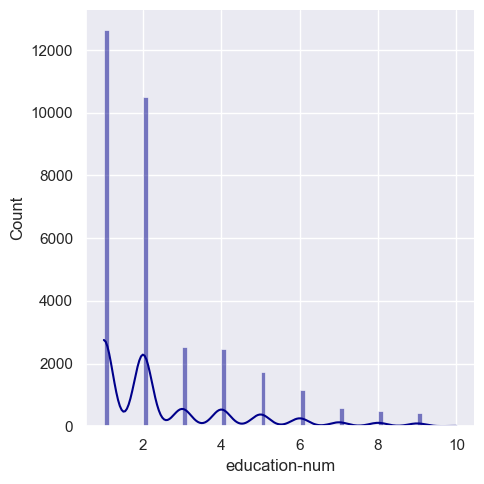

In [72]:
plt.figure(figsize=(30,5))
sns.displot(adult['education-num'], kde=True, color='darkblue')

- Capital Gain 
- Capital Loss

<Axes: xlabel='capital-loss', ylabel='Count'>

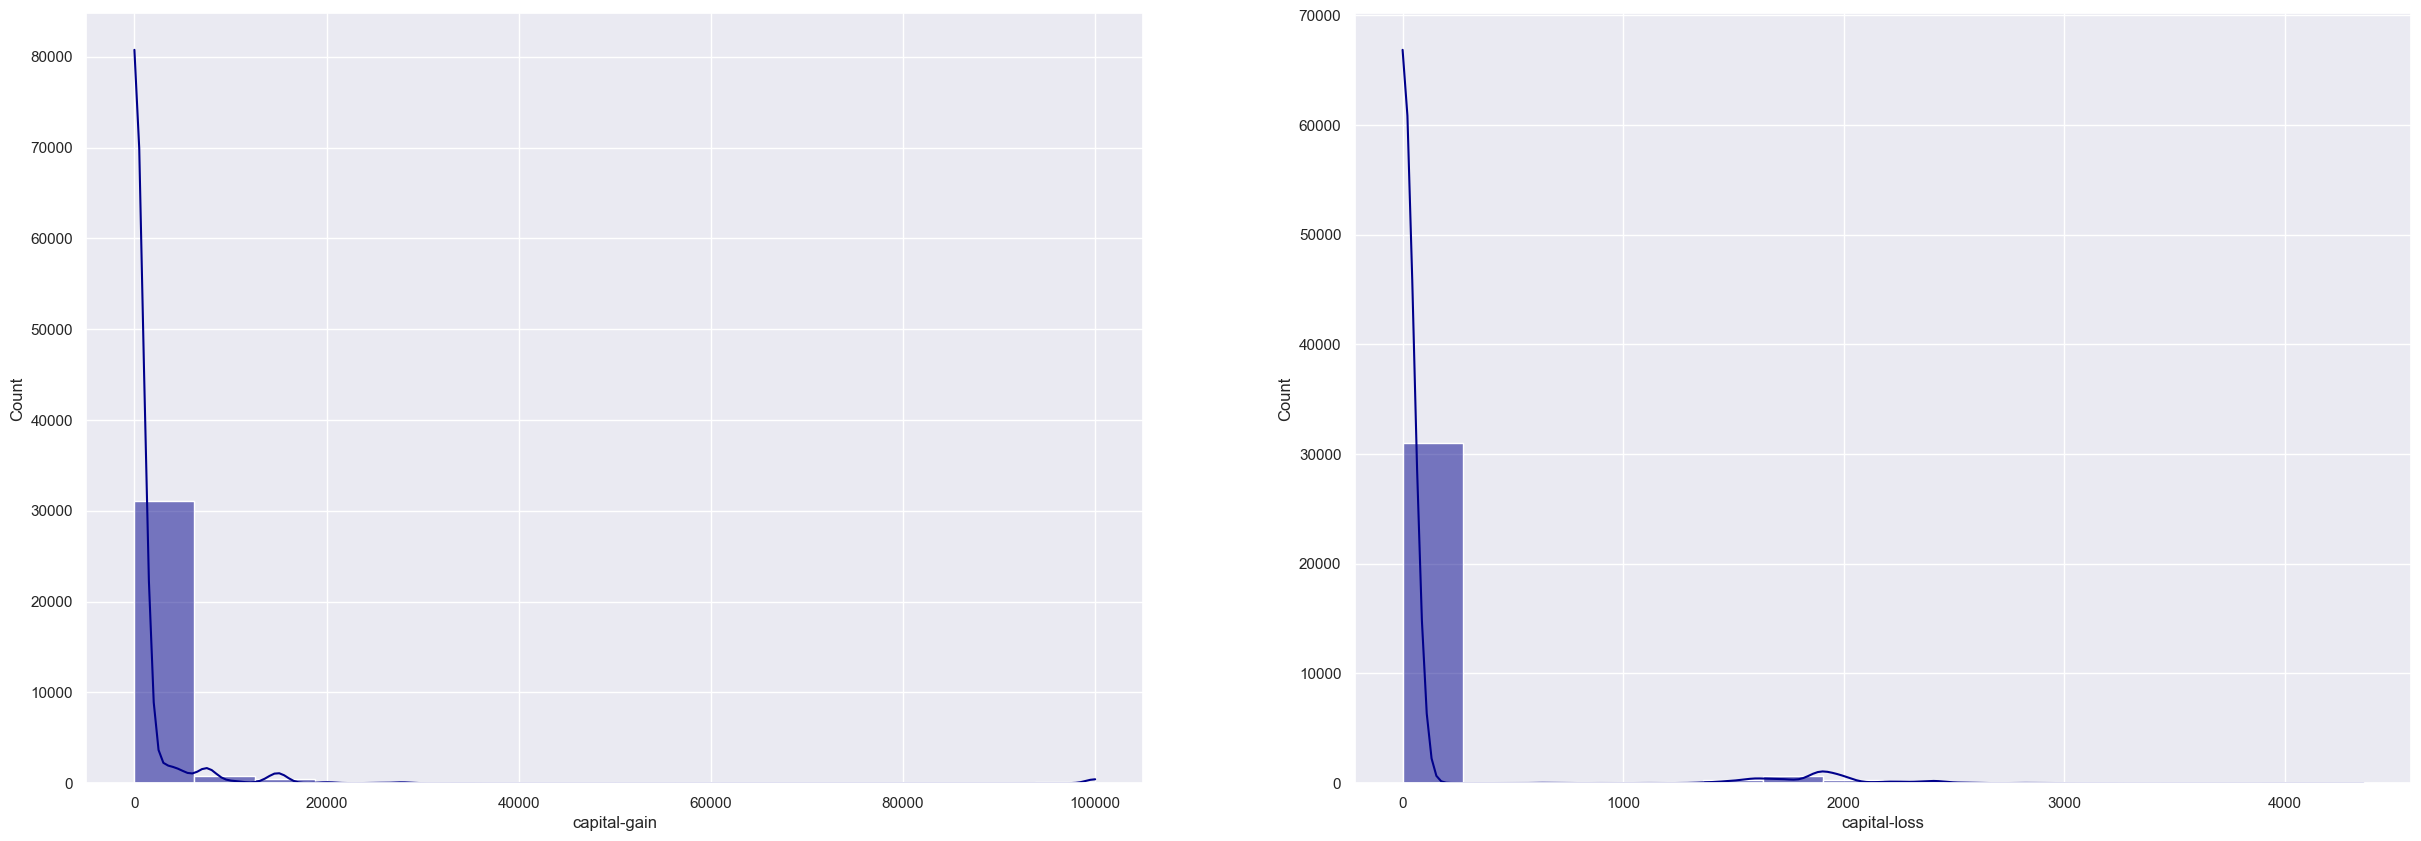

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(30,10))

sns.histplot(adult['capital-gain'], kde=True, color='darkblue', ax = ax[0])
sns.histplot(adult['capital-loss'], kde=True, color='darkblue', ax = ax[1])

- Hours Per Week

<Figure size 3000x500 with 0 Axes>

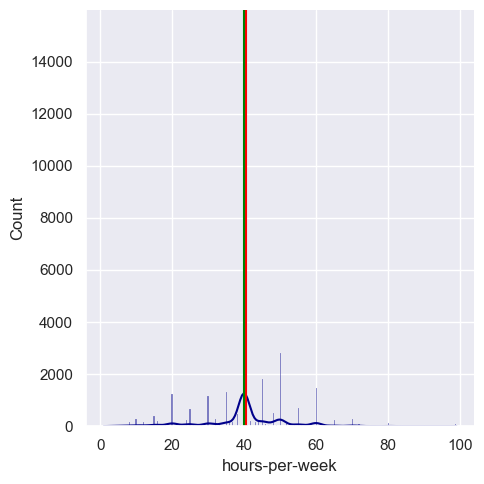

In [74]:
plt.figure(figsize=(30,5))
sns.displot(adult['hours-per-week'], kde=True, color='darkblue')

# Show mean and median on the plot
plt.axvline(x=adult['hours-per-week'].mean(), color='red')
plt.axvline(x=adult['hours-per-week'].median(), color='green')

#####  Categorical Features EDA

In [75]:
[col for col in adult.columns if adult[col].dtypes == 'object']

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

- workclass

<Axes: xlabel='workclass', ylabel='count'>

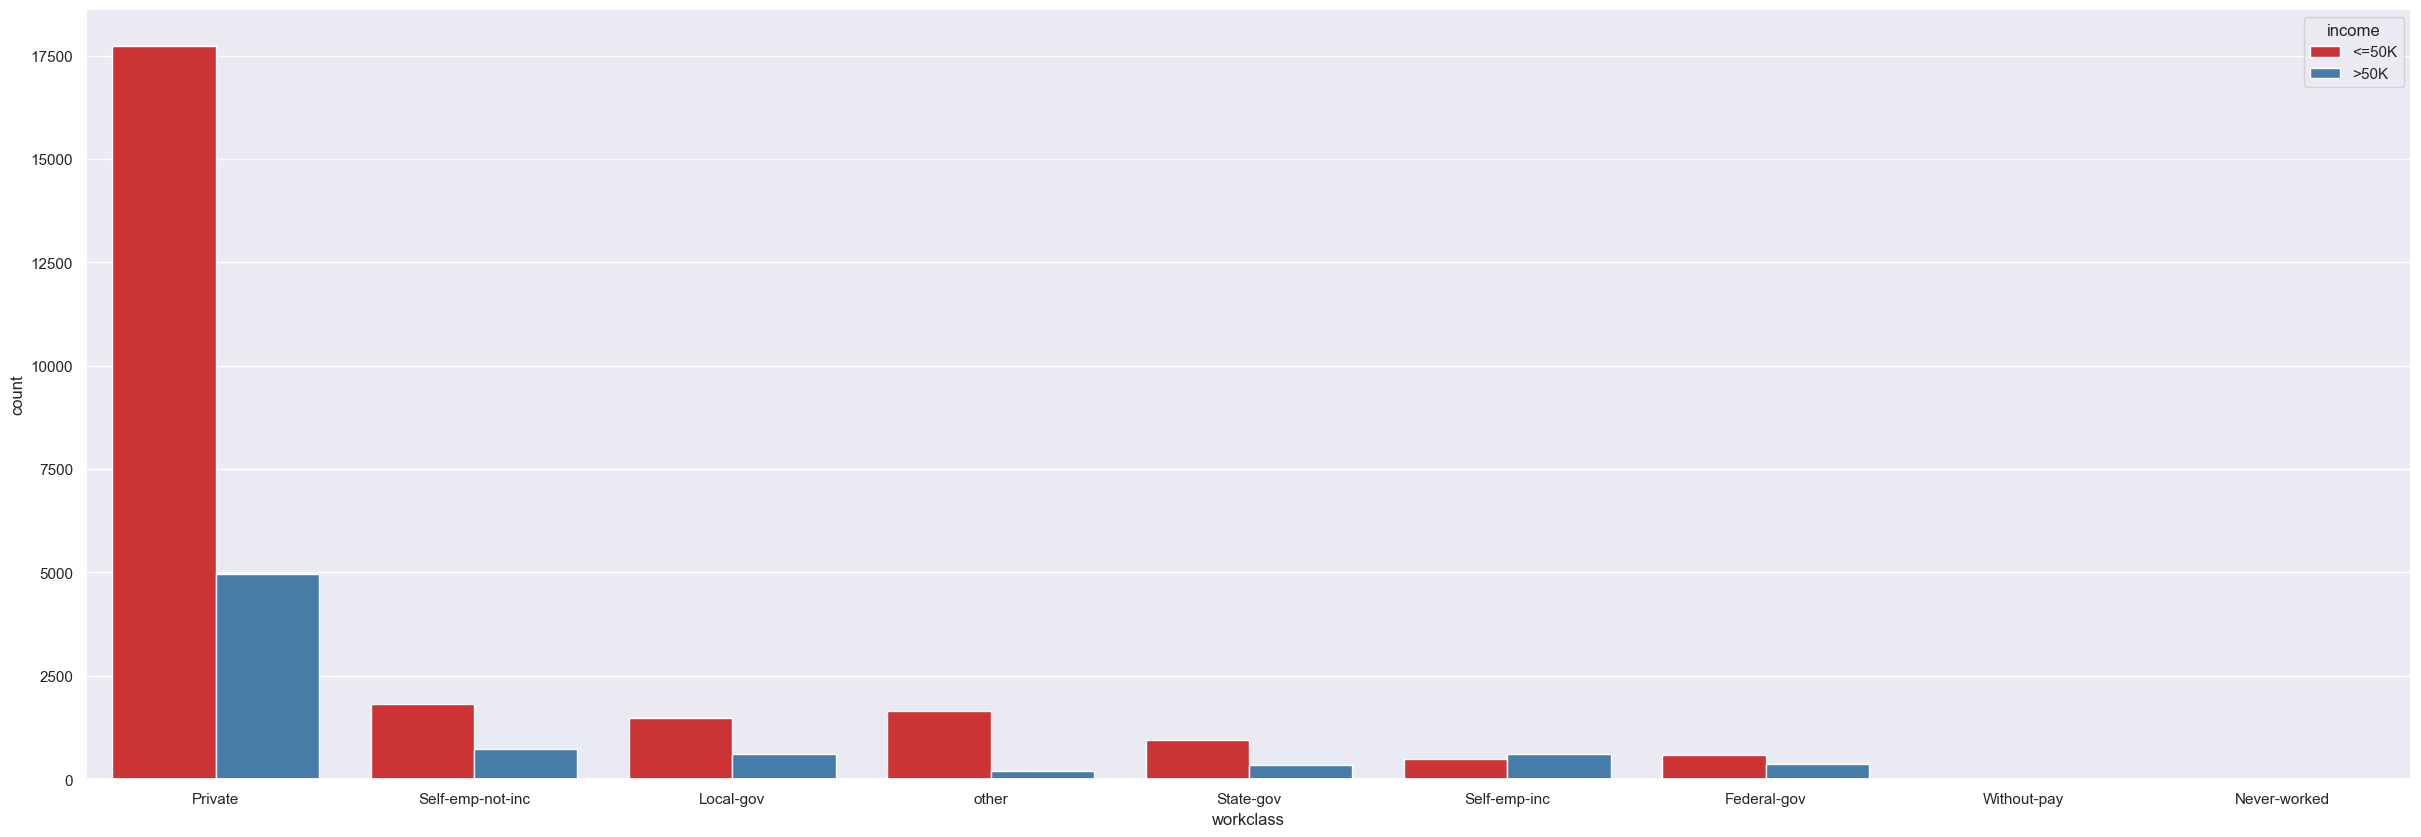

In [76]:
plt.figure(figsize=(30,10))
sns.countplot(x='workclass', data=adult, order=adult['workclass'].value_counts().index, color='darkblue', palette='Set1', hue='income')

<Axes: xlabel='workclass', ylabel='income'>

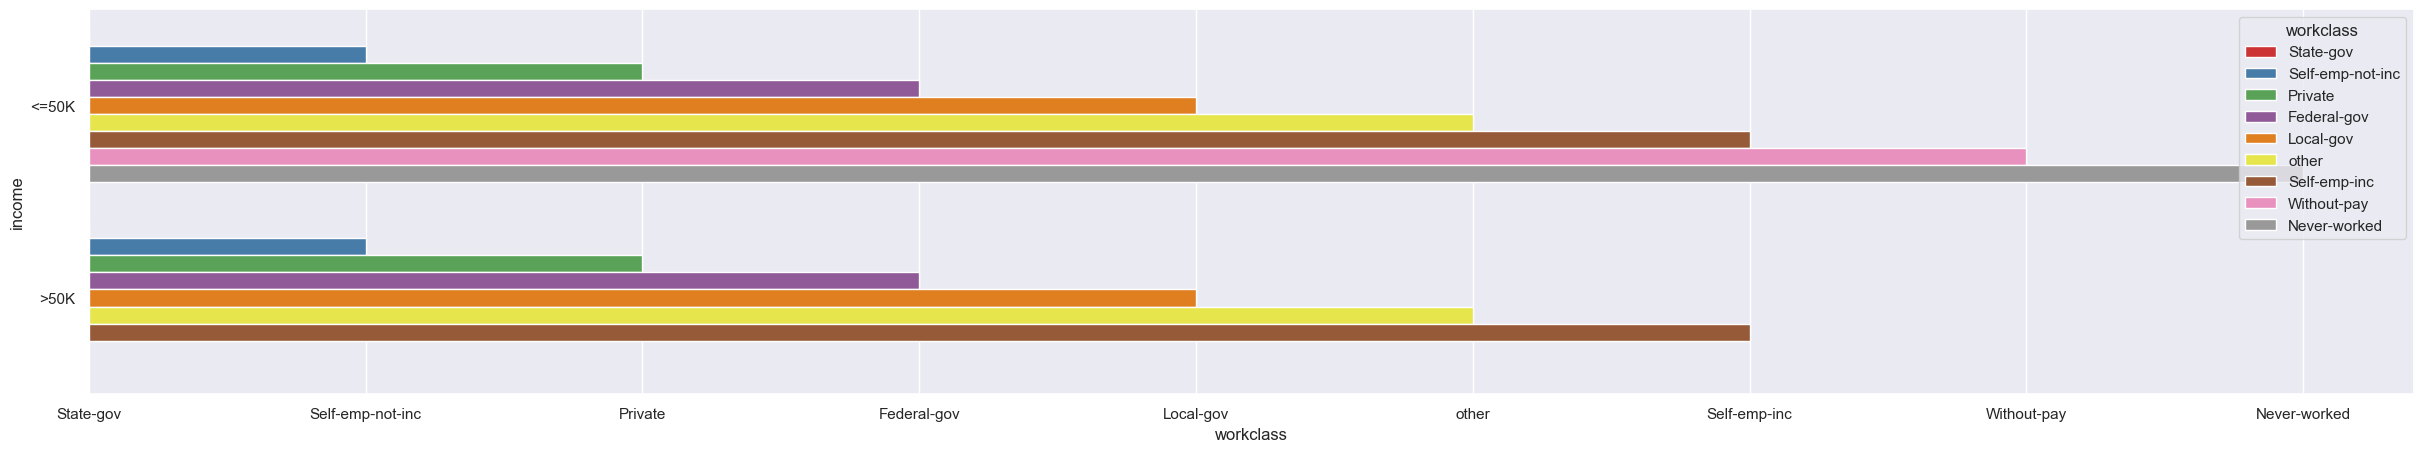

In [77]:
plt.figure(figsize=(30,5))
sns.barplot(x='workclass', y='income', data=adult, palette='Set1', hue='workclass', orient='h')

- education

In [78]:
adult['education'].unique()

array(['Bachelors', 'High School Graduation', 'Upper Secondary Education',
       'Masters', 'Lower Secondary Education', 'Associate', 'Doctorate',
       'Prof-school', 'Primary Education', 'Preschool'], dtype=object)

<Axes: xlabel='education', ylabel='count'>

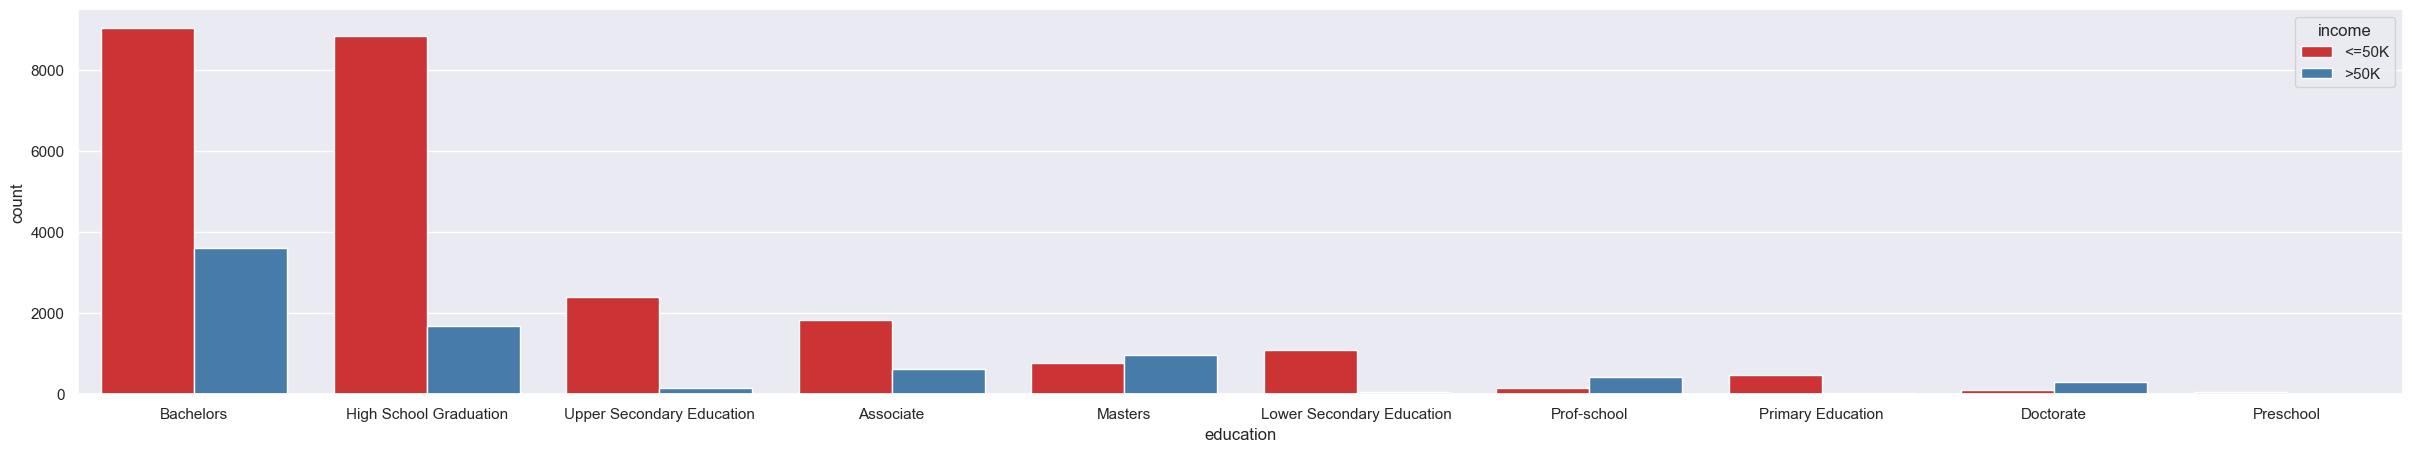

In [79]:
plt.figure(figsize=(30,5))
sns.countplot(x='education', data=adult, order=adult['education'].value_counts().index, color='darkblue', palette='Set1', hue='income')

<Axes: xlabel='education', ylabel='income'>

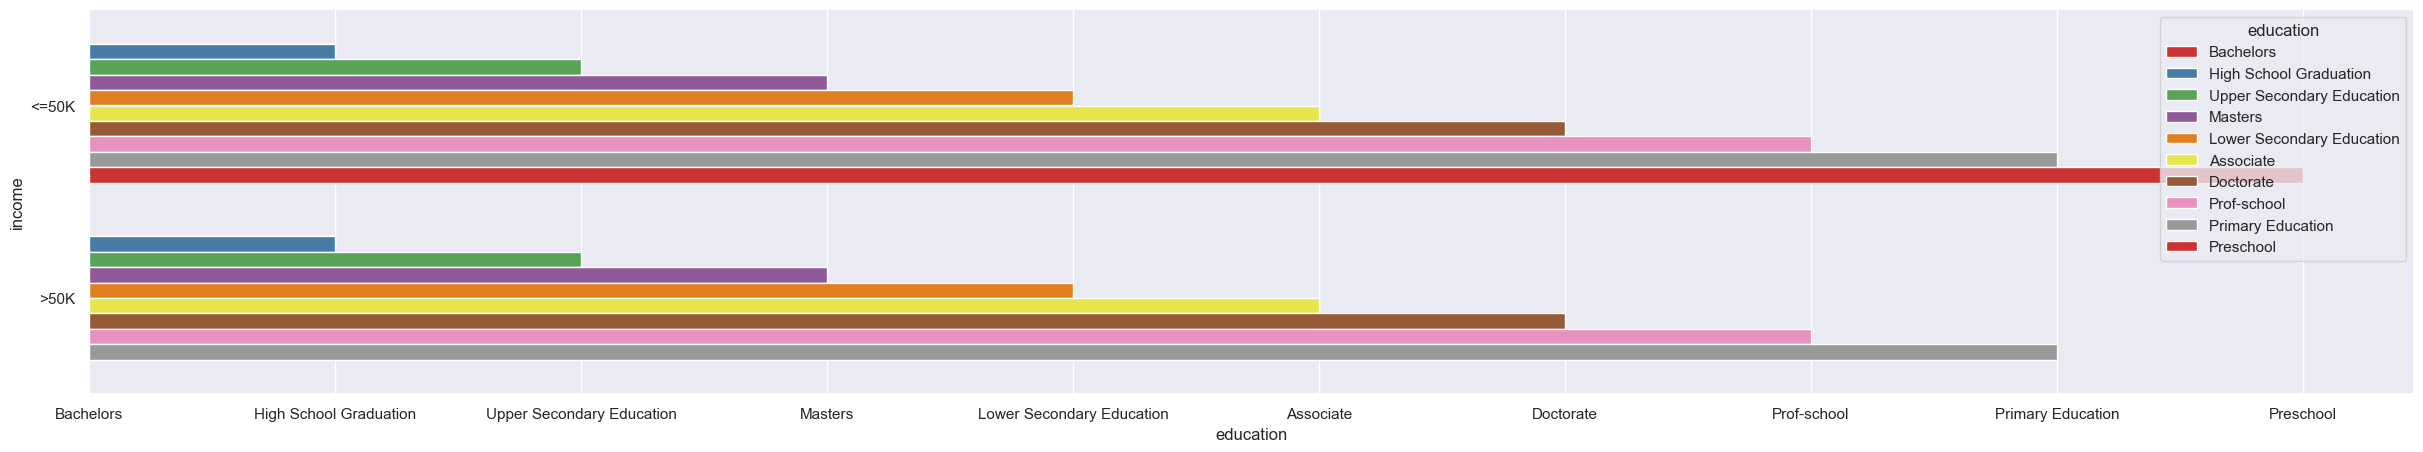

In [80]:
plt.figure(figsize=(30,5))
sns.barplot(x='education', y='income', data=adult, palette='Set1', hue='education', orient='h')

- marital-status

<Axes: xlabel='marital-status', ylabel='count'>

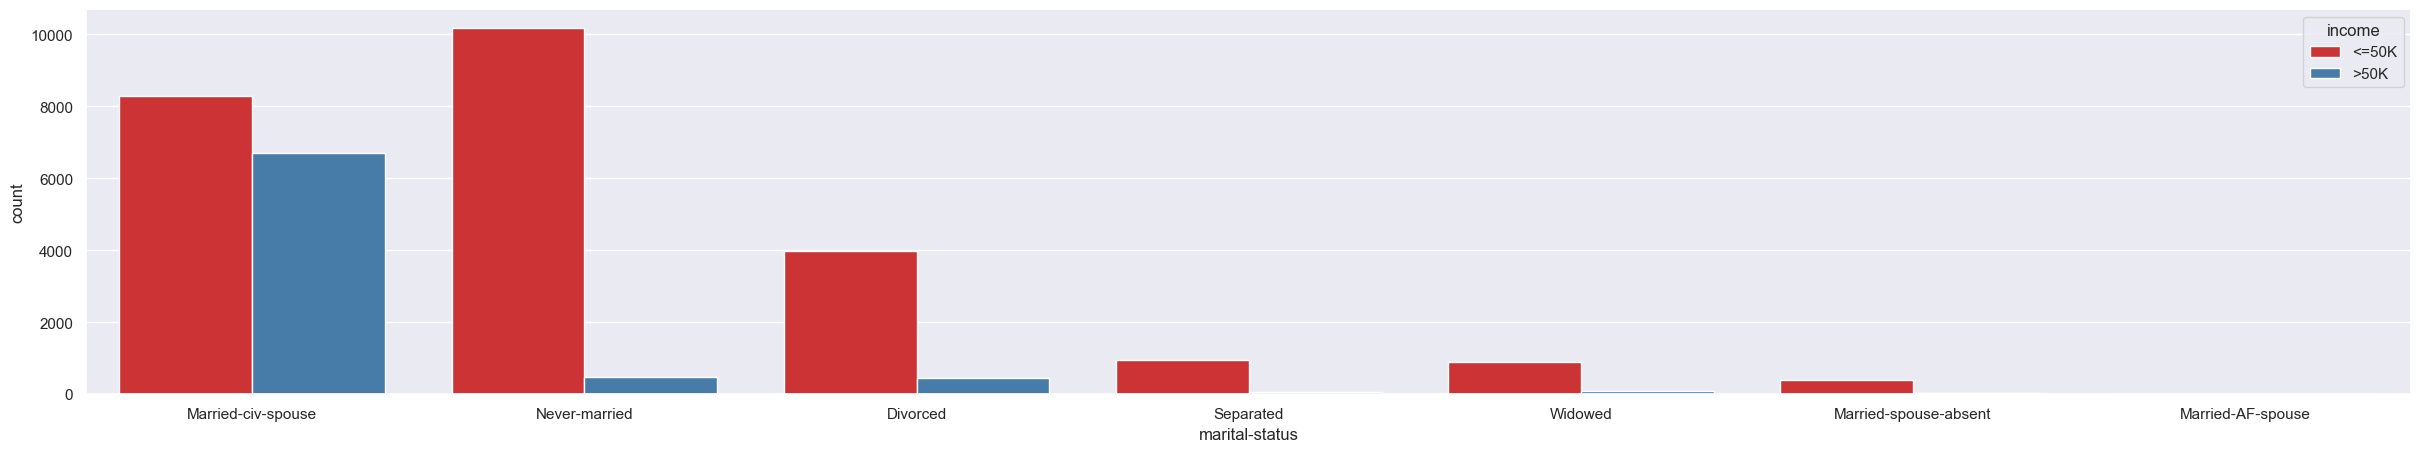

In [81]:
plt.figure(figsize=(30,5))
sns.countplot(x='marital-status', data=adult, order=adult['marital-status'].value_counts().index, color='darkblue', palette='Set1', hue='income')

<Axes: xlabel='marital-status', ylabel='income'>

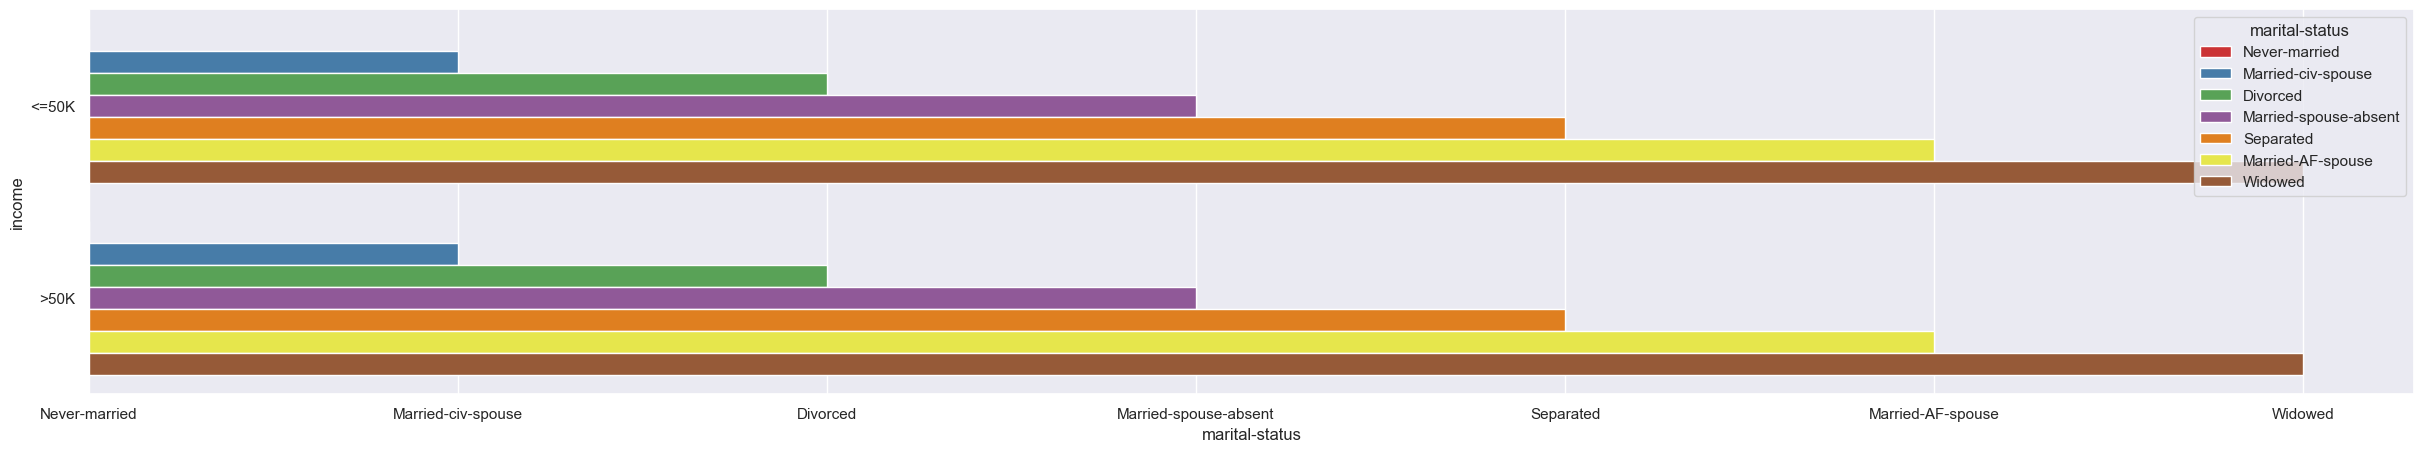

In [82]:
plt.figure(figsize=(30,5))
sns.barplot(x='marital-status', y='income', data=adult, palette='Set1', hue='marital-status', orient='h')

- occupation

<Axes: xlabel='occupation', ylabel='count'>

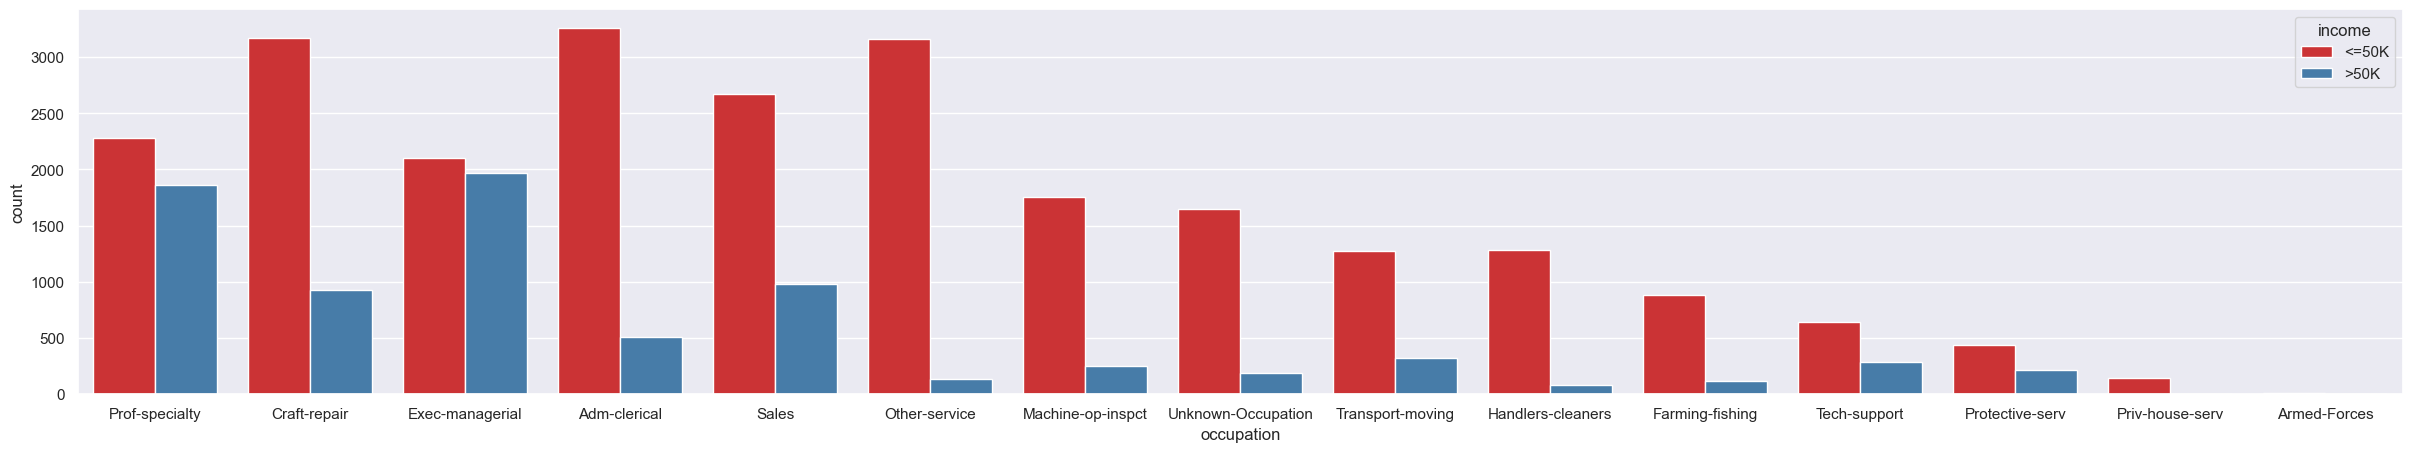

In [83]:
plt.figure(figsize=(30,5))
sns.countplot(x='occupation', data=adult, order=adult['occupation'].value_counts().index, color='darkblue', palette='Set1', hue='income')

<Axes: xlabel='occupation', ylabel='income'>

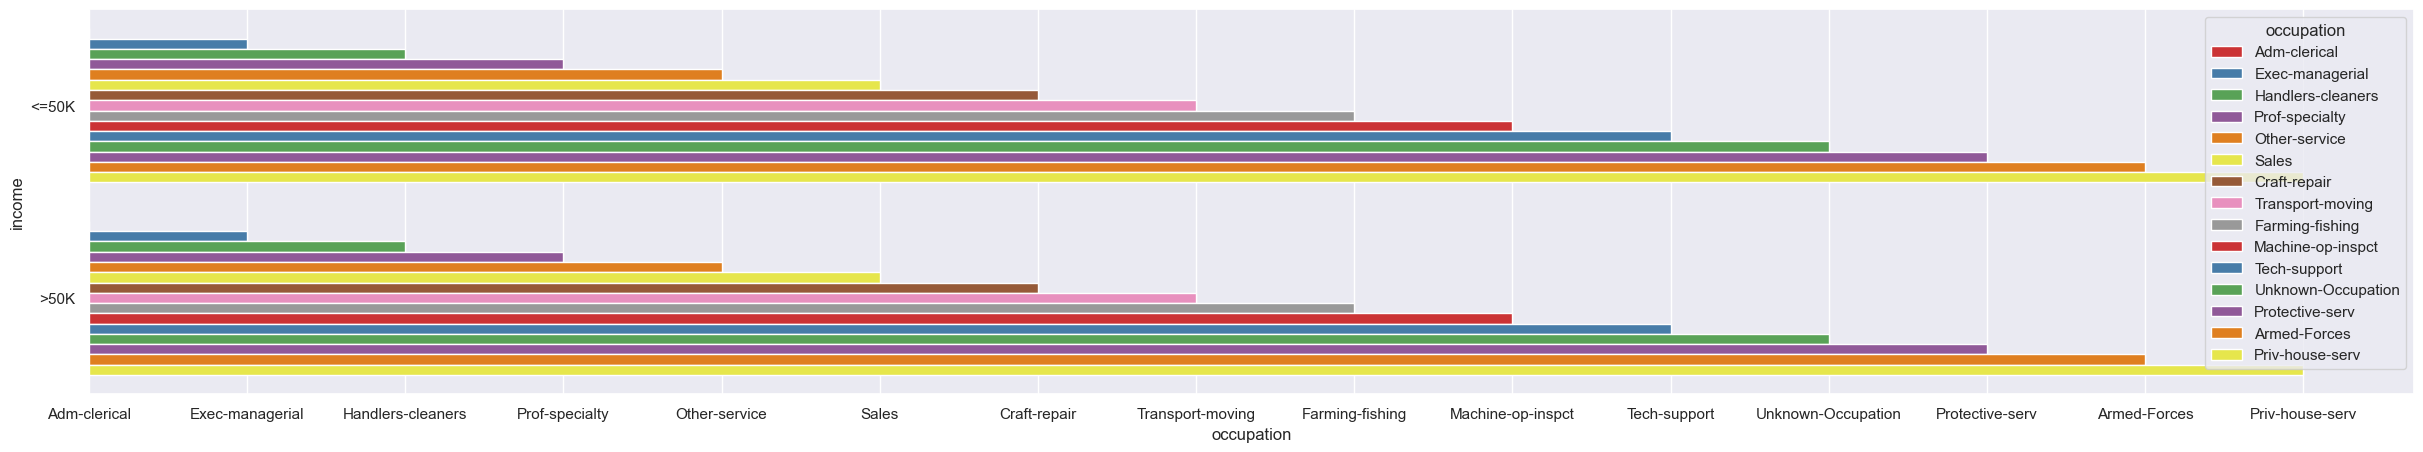

In [84]:
plt.figure(figsize=(30,5))
sns.barplot(x='occupation', y='income', data=adult, palette='Set1', hue='occupation', orient='h')

- relationship

<Axes: xlabel='relationship', ylabel='count'>

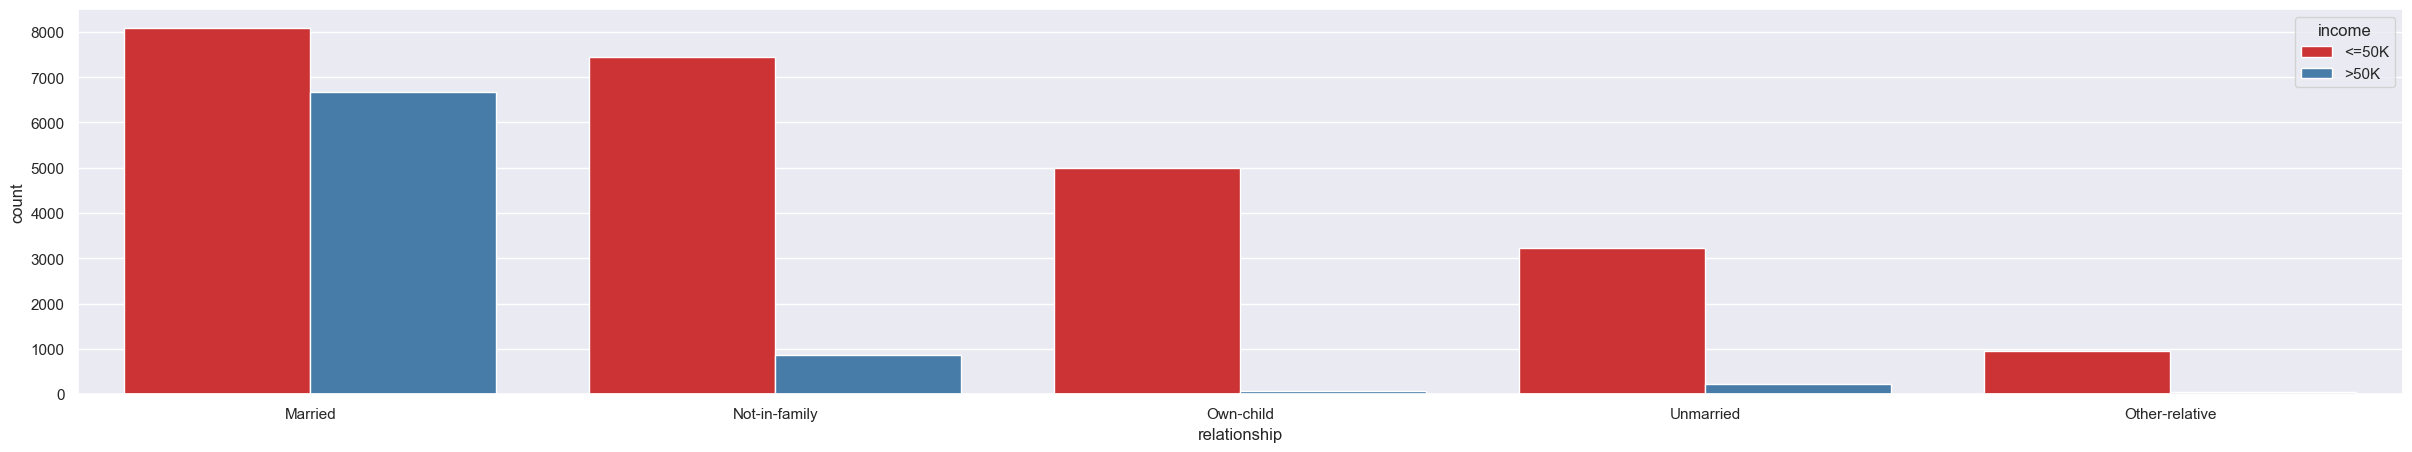

In [85]:
plt.figure(figsize=(30,5))
sns.countplot(x='relationship', data=adult, order=adult['relationship'].value_counts().index, color='darkblue', palette='Set1', hue='income')

<Axes: xlabel='relationship', ylabel='income'>

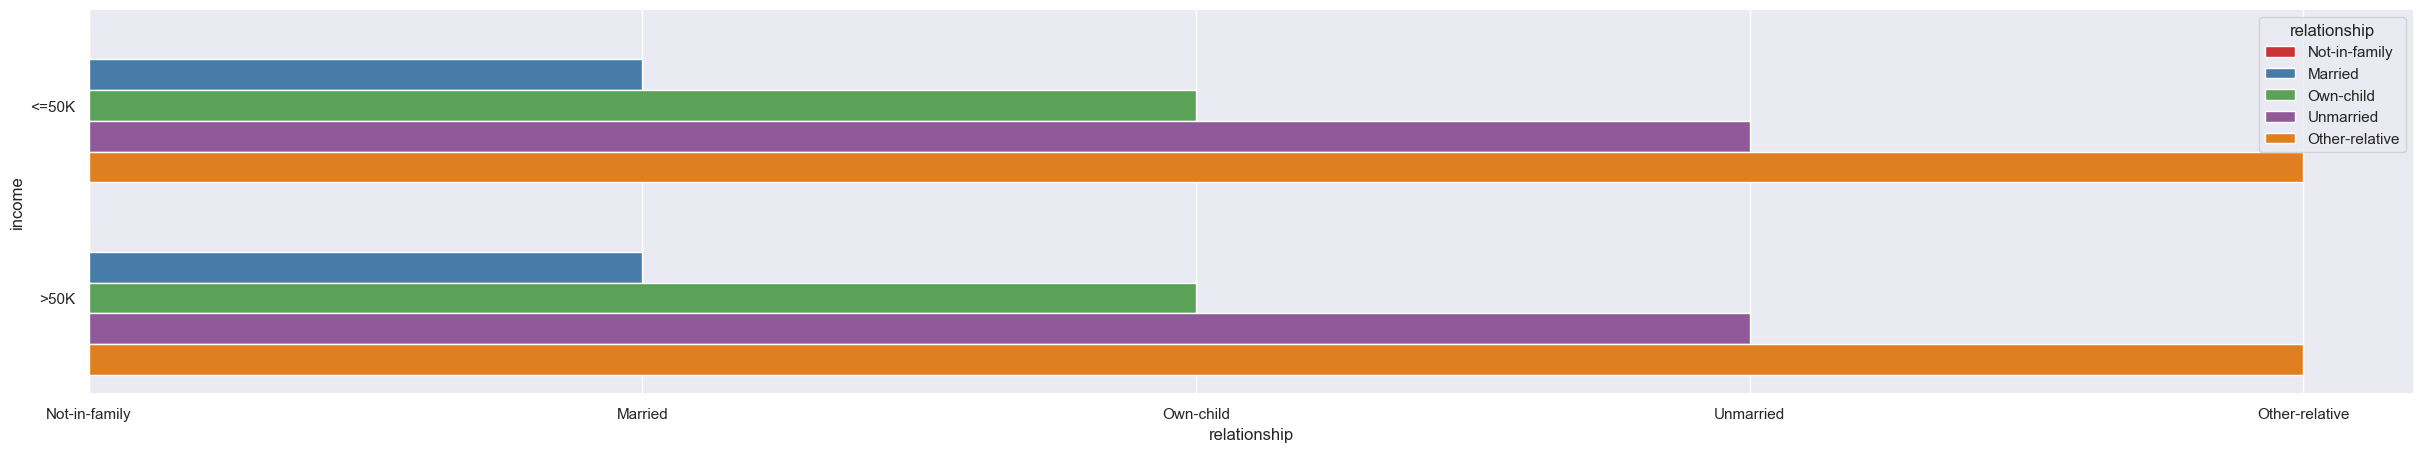

In [86]:
plt.figure(figsize=(30,5))
sns.barplot(x='relationship', y='income', data=adult, palette='Set1', hue='relationship', orient='h')

- race

<Axes: xlabel='race', ylabel='count'>

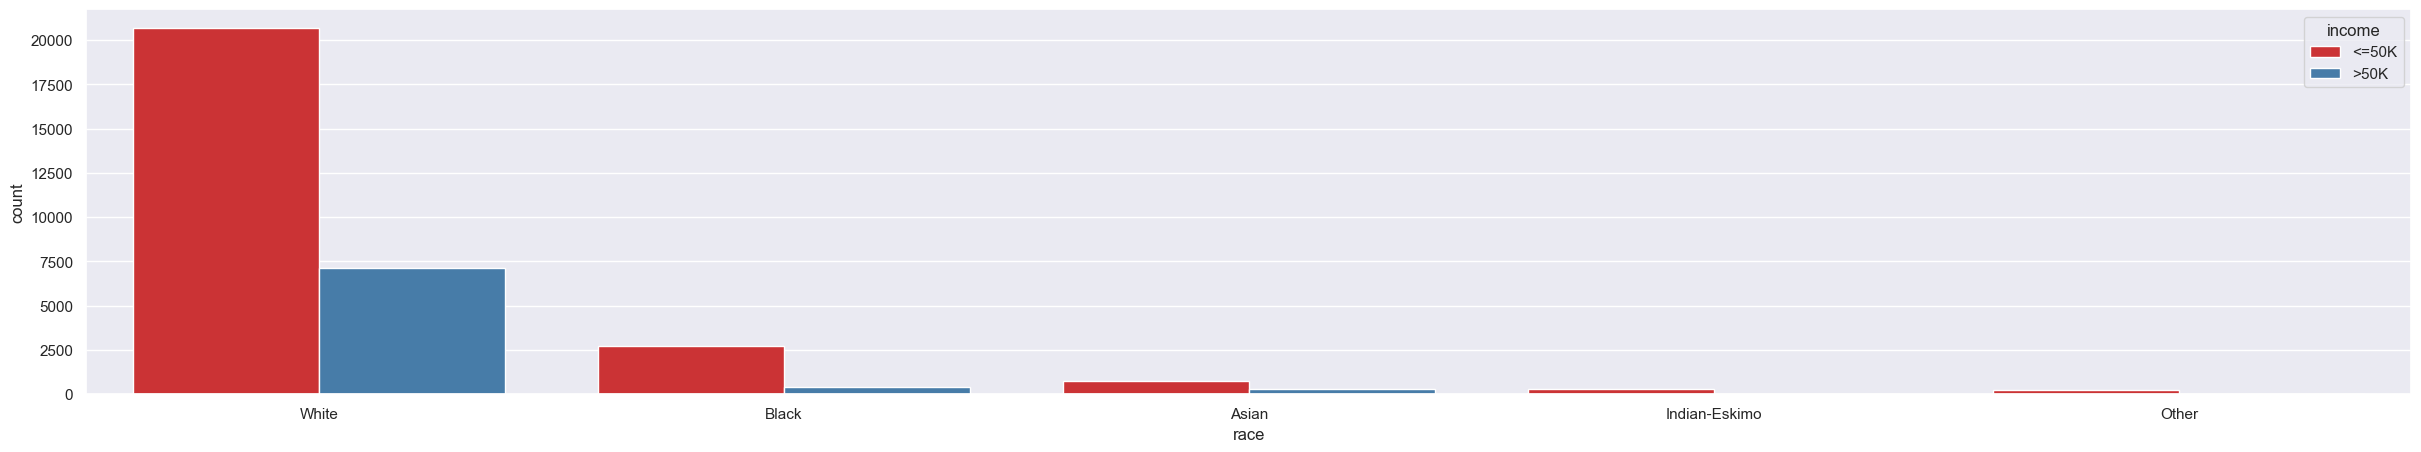

In [87]:
plt.figure(figsize=(30,5))
sns.countplot(x='race', data=adult, order=adult['race'].value_counts().index, color='darkblue', palette='Set1', hue='income')

<Axes: xlabel='race', ylabel='income'>

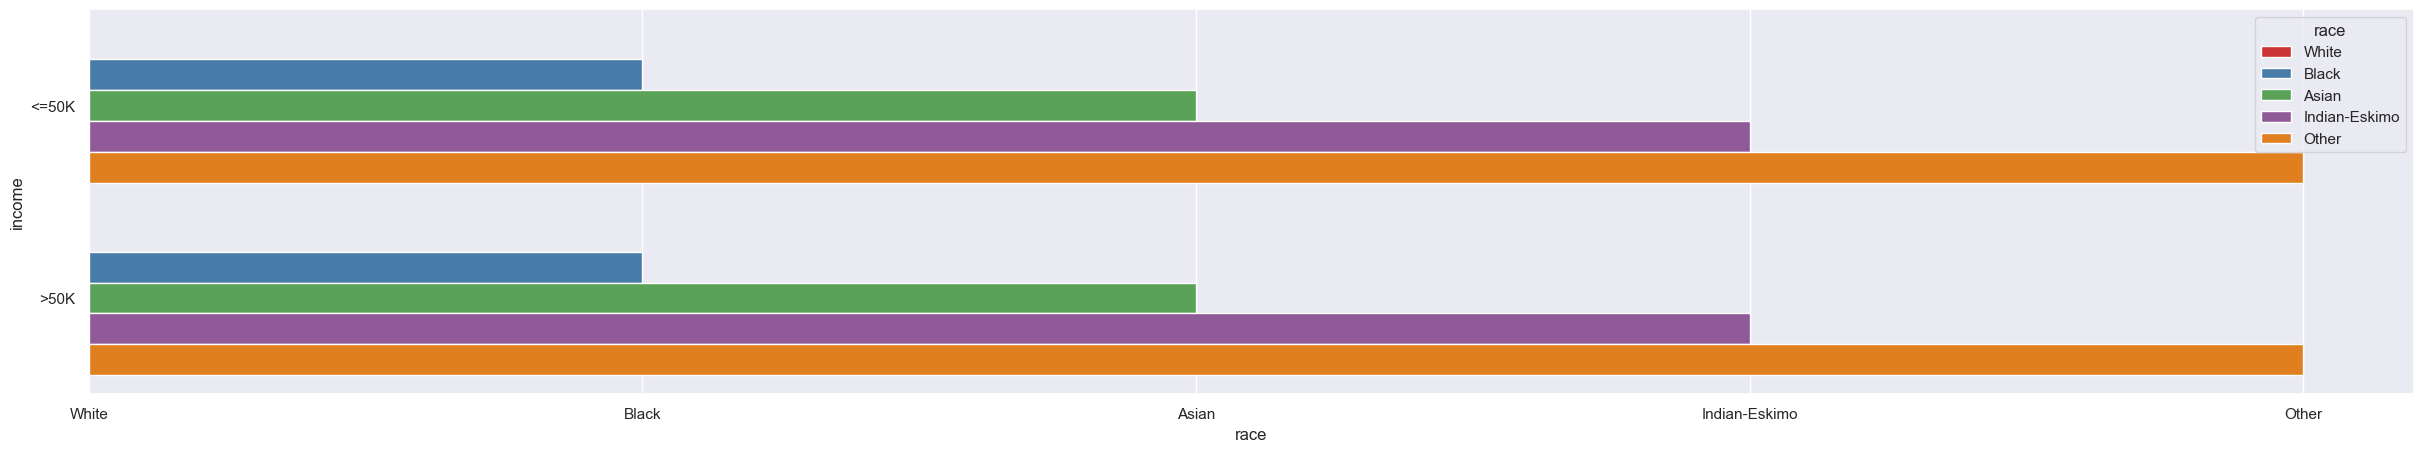

In [88]:
plt.figure(figsize=(30,5))
sns.barplot(x='race', y='income', data=adult, palette='Set1', hue='race', orient='h')

- sex

<Axes: xlabel='sex', ylabel='count'>

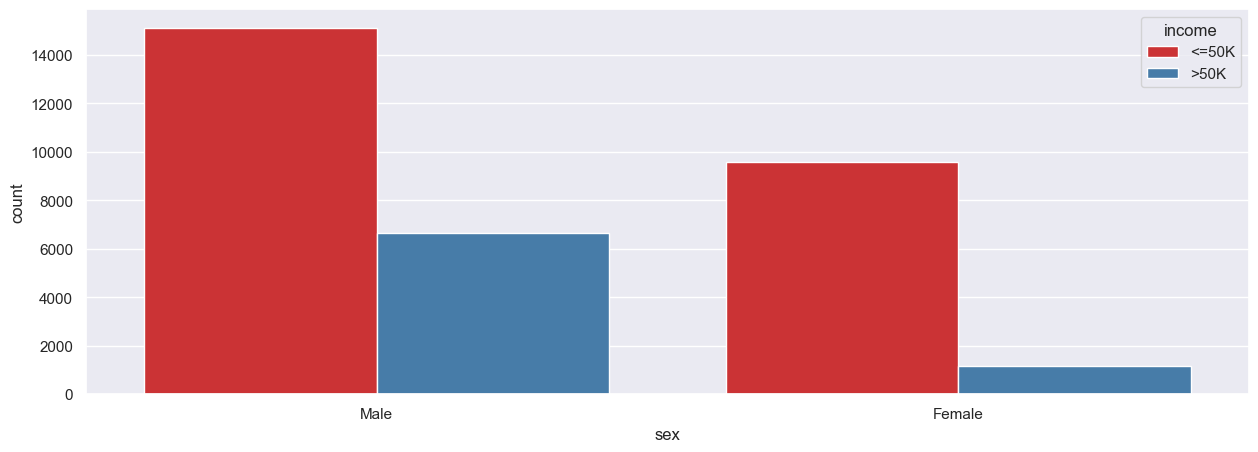

In [89]:
plt.figure(figsize=(15,5))
sns.countplot(x='sex', data=adult, order=adult['sex'].value_counts().index, color='darkblue', palette='Set1', hue='income')

- Sex Vs. race

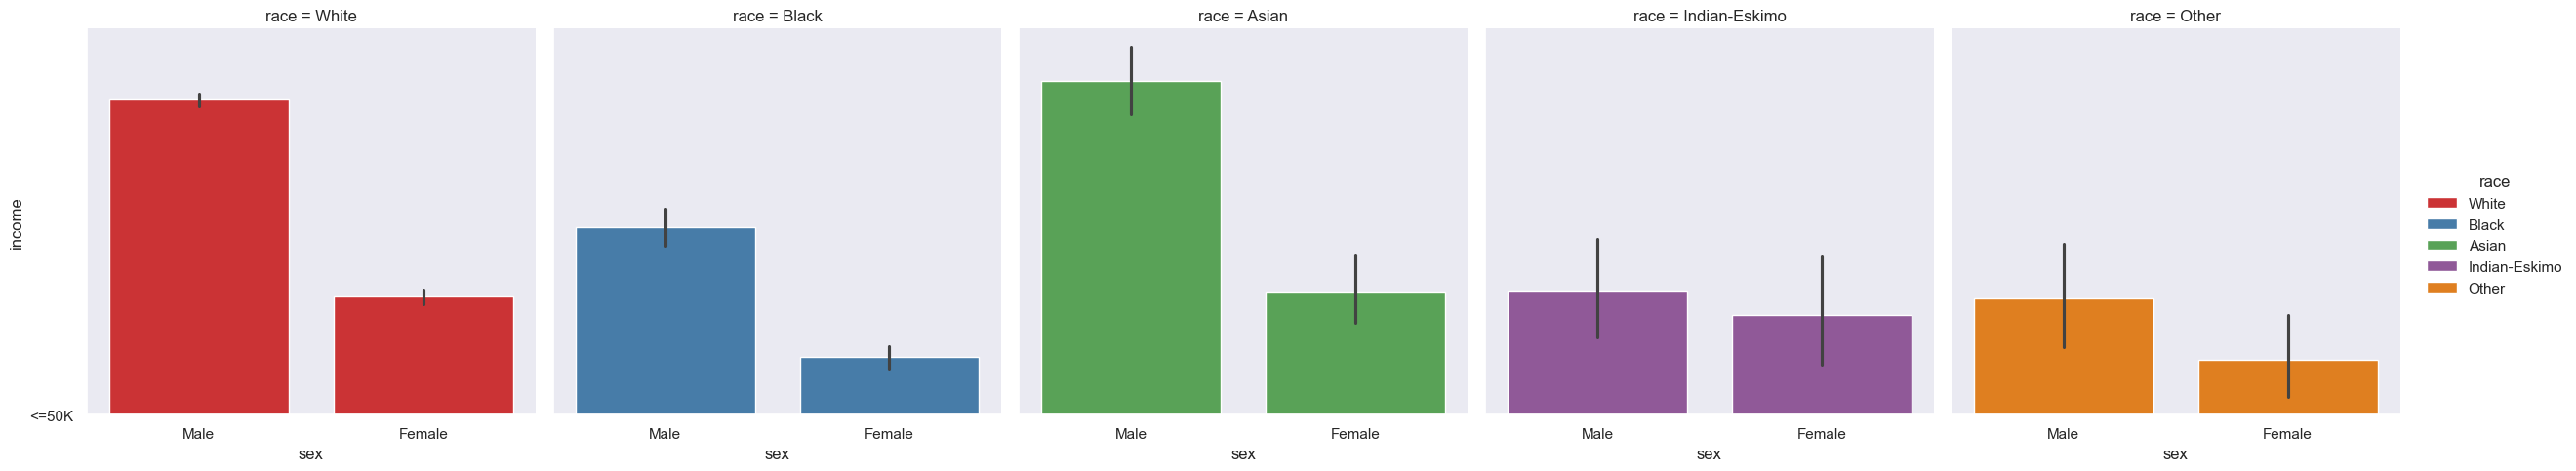

In [99]:
sns.catplot(x = 'sex', y = 'income', data = adult, kind = 'bar', col = 'race', height = 5, aspect = 1, palette = 'Set1', hue = 'race')
# invert y axis
plt.gca().invert_yaxis()
plt.show()

- native-country

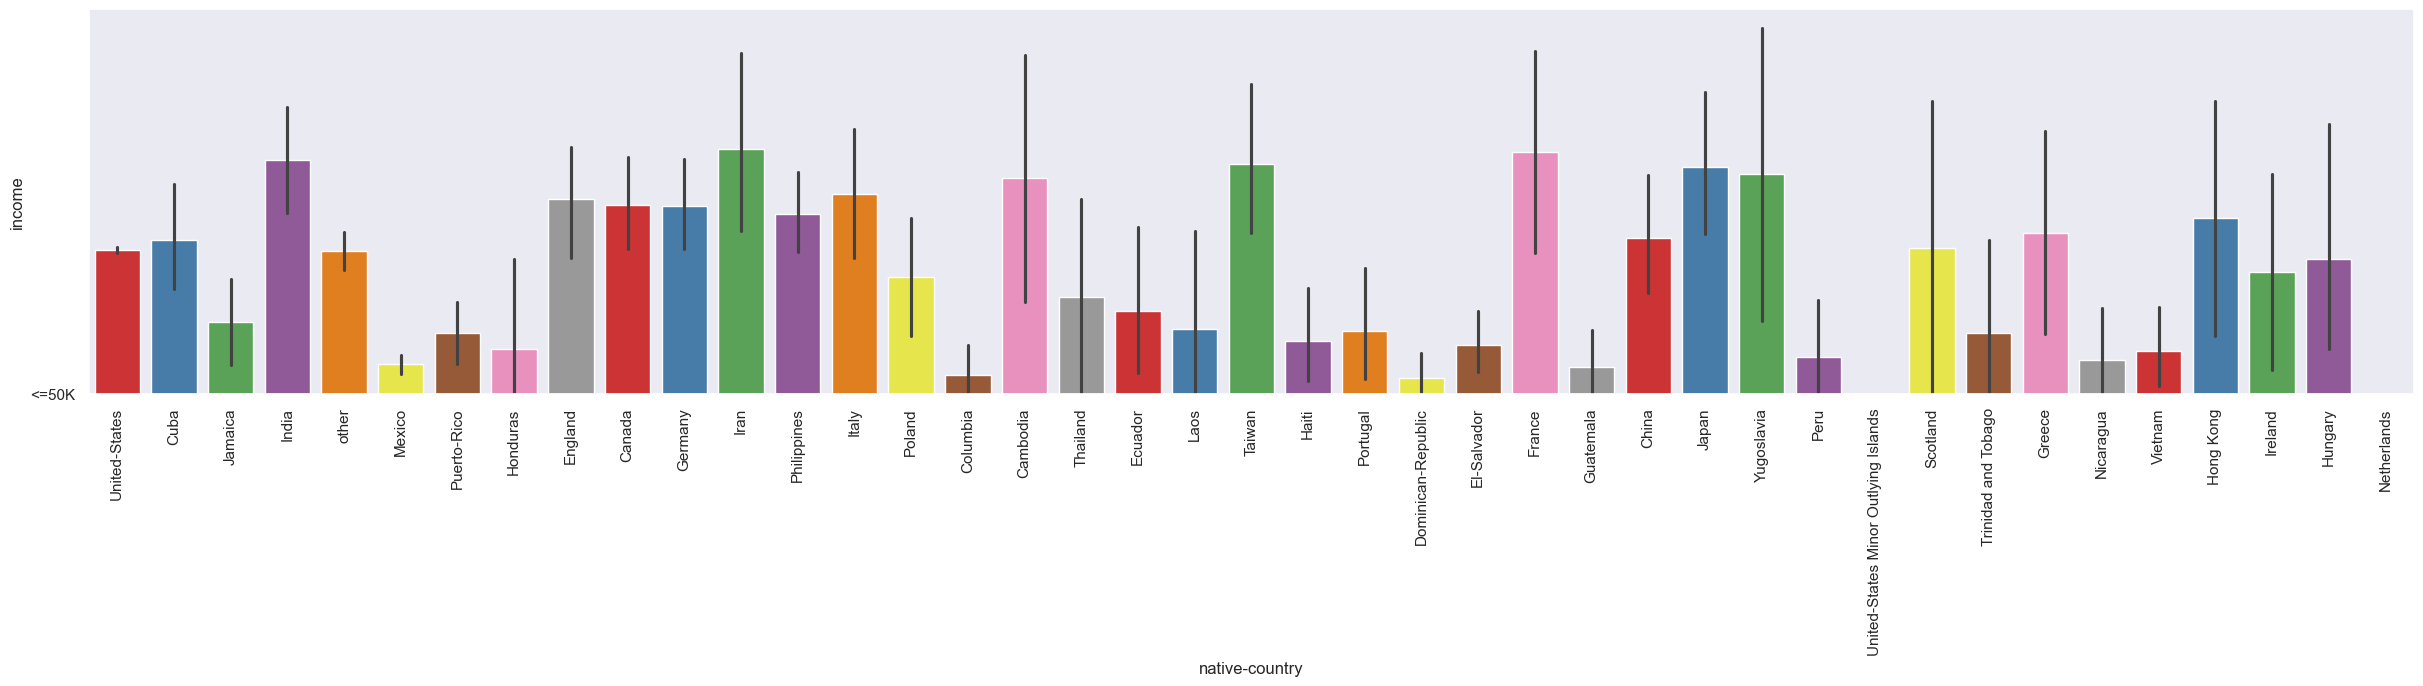

In [100]:
plt.figure(figsize=(40,5))
sns.barplot(x = 'native-country', y = 'income', data = adult, palette = 'Set1', hue = 'native-country')
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.show()

- income

<Axes: xlabel='income', ylabel='count'>

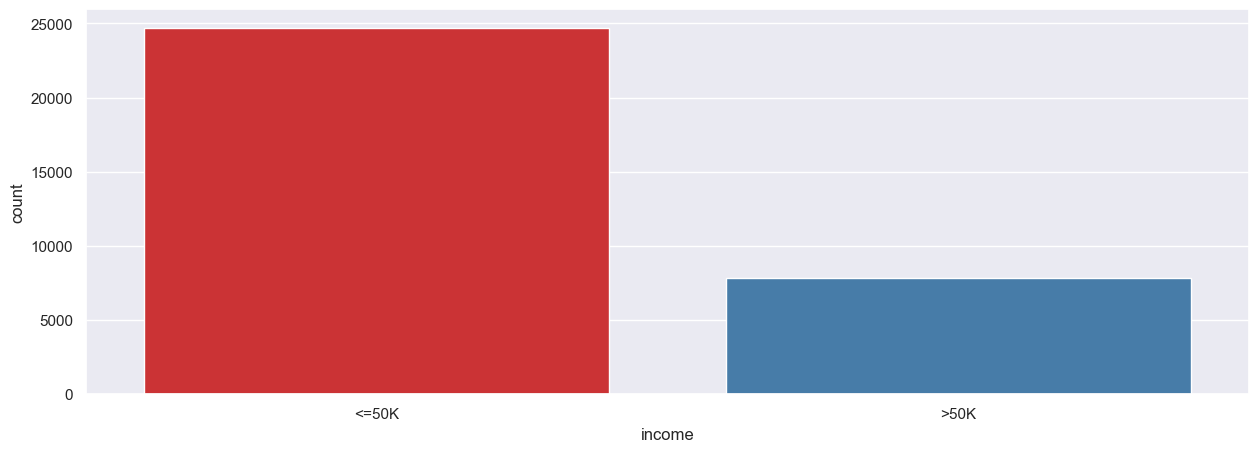

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x='income', data=adult, order=adult['income'].value_counts().index, color='darkblue', palette='Set1', hue='income')

### Feature Engineering

In [289]:
df_adult = adult.copy()

In [290]:
[col for col in df_adult.columns if df_adult[col].dtypes != 'object']

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [291]:
df_adult.describe(include='number').round(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,6.41,1077.65,87.30,40.44
std,13.64,105549.98,1.84,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,5.00,0.00,0.00,40.00
50%,37.00,178356.00,7.00,0.00,0.00,40.00
75%,48.00,237051.00,8.00,0.00,0.00,45.00
max,90.00,1484705.00,10.00,99999.00,4356.00,99.00


<Axes: xlabel='hours-per-week'>

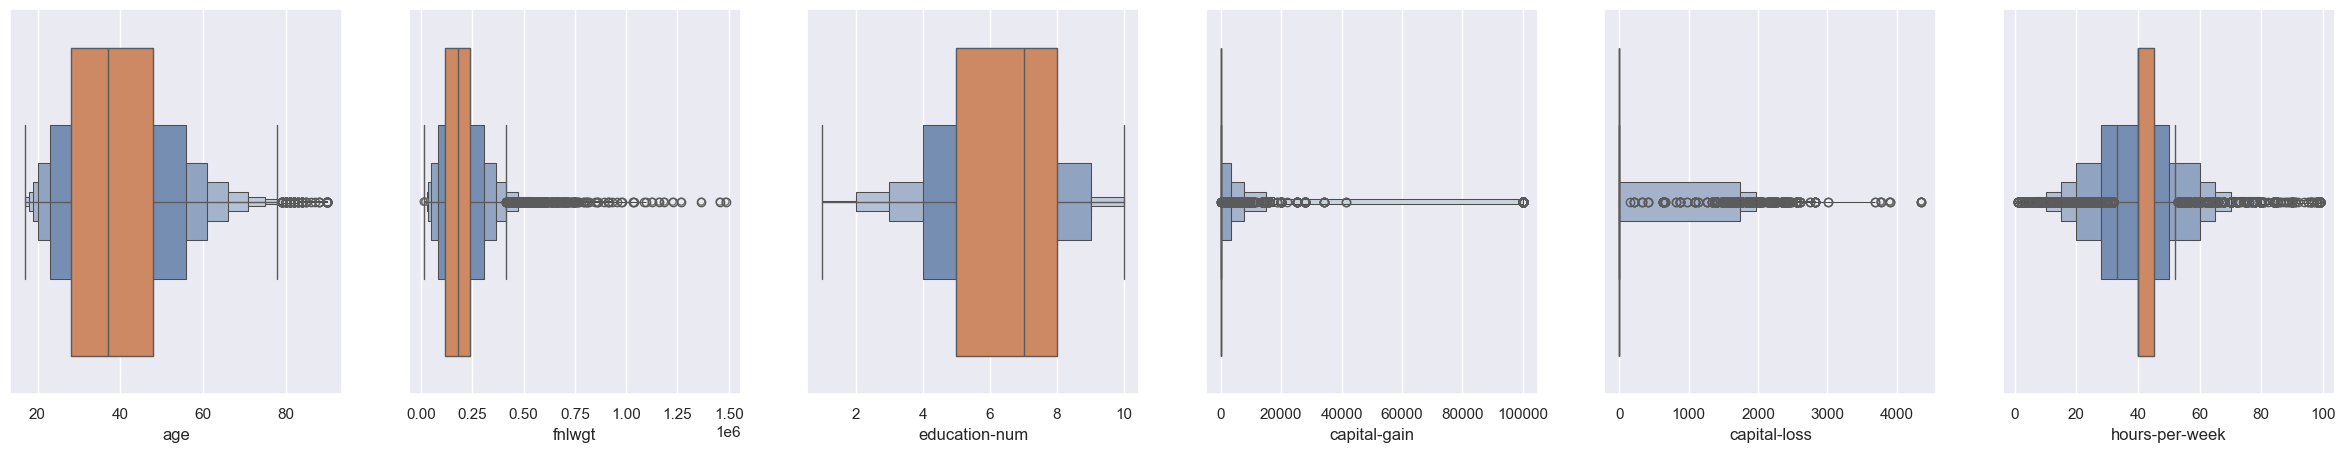

In [292]:
fig, ax = plt.subplots(1, 6, figsize=(30,5))

sns.boxenplot(x=df_adult['age'], ax=ax[0])
sns.boxplot(x=df_adult['age'],ax=ax[0])

sns.boxenplot(x=df_adult['fnlwgt'], ax=ax[1])
sns.boxplot(x=df_adult['fnlwgt'],ax=ax[1])

sns.boxenplot(x=df_adult['education-num'], ax=ax[2])
sns.boxplot(x=df_adult['education-num'],ax=ax[2])

sns.boxenplot(x=df_adult['capital-gain'], ax=ax[3])
sns.boxplot(x=df_adult['capital-gain'],ax=ax[3])

sns.boxenplot(x=df_adult['capital-loss'], ax=ax[4])
sns.boxplot(x=df_adult['capital-loss'],ax=ax[4])

sns.boxenplot(x=df_adult['hours-per-week'], ax=ax[5])
sns.boxplot(x=df_adult['hours-per-week'],ax=ax[5])

- age

17 90


<Axes: ylabel='Frequency'>

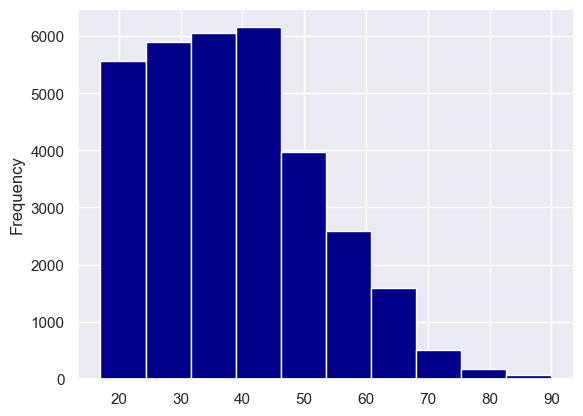

In [293]:
print(df_adult['age'].min(), df_adult['age'].max())
df_adult['age'].plot(kind='hist',color='darkblue')

In [294]:
bins = pd.qcut(df_adult['age'], q=5, duplicates='drop')
bin_labels = [1, 2, 3, 4, 5]
df_adult['age'] = pd.qcut(adult['age'], q=5, duplicates='drop', labels=bin_labels)

In [295]:
df_adult['age'].unique()

[3, 4, 5, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

- capital gain
- capital loss

<Axes: xlabel='capital-loss', ylabel='Count'>

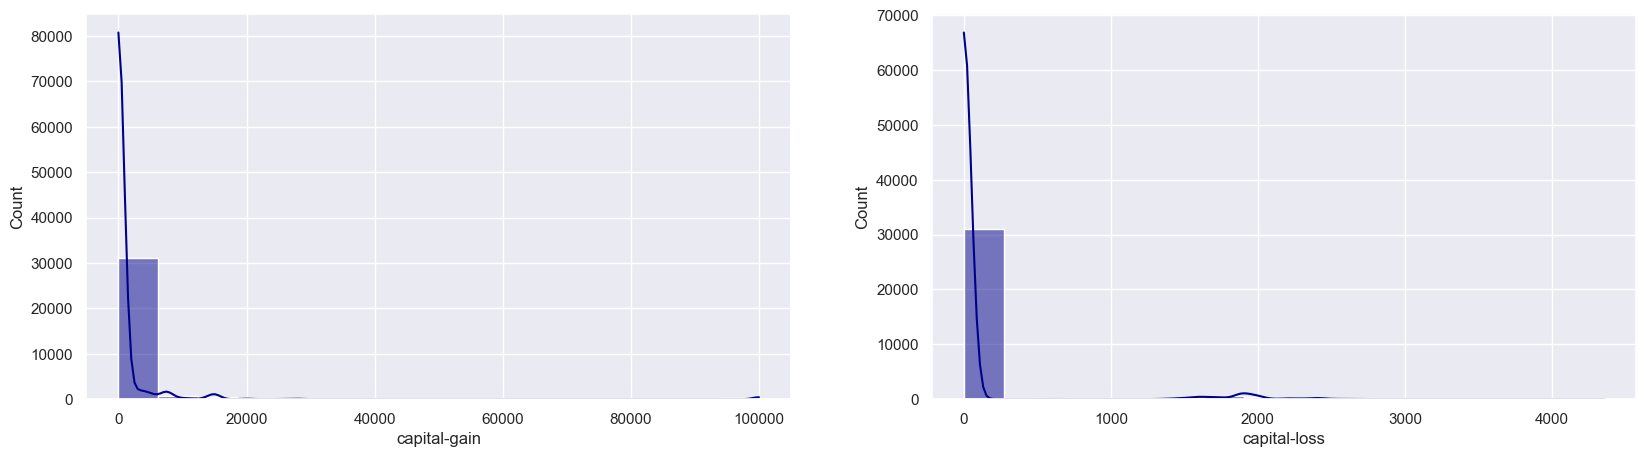

In [296]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.histplot(adult['capital-gain'], kde=True, color='darkblue', ax = ax[0])
sns.histplot(adult['capital-loss'], kde=True, color='darkblue', ax = ax[1])

Handling Skewness

In [297]:
# Handling skewness of capital-gain and capital-loss
df_adult['capital-gain'] = np.log1p(df_adult['capital-gain'])
df_adult['capital-loss'] = np.log1p(df_adult['capital-loss'])

<Axes: title={'center': 'After Log Transformation'}, xlabel='capital-loss', ylabel='Count'>

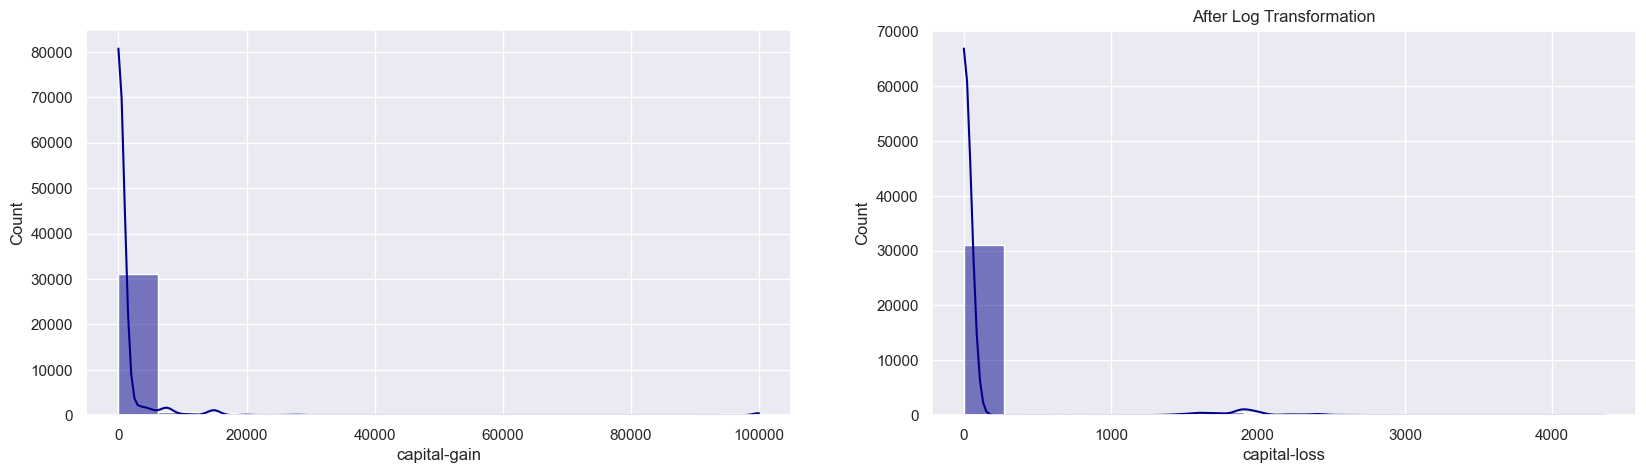

In [298]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

plt.title('After Log Transformation')
sns.histplot(adult['capital-gain'], kde=True, color='darkblue', ax = ax[0])

plt.title('After Log Transformation')
sns.histplot(adult['capital-loss'], kde=True, color='darkblue', ax = ax[1])

In [299]:
df_adult['capital_diff'] = abs(df_adult['capital-gain'] - df_adult['capital-loss'])

In [300]:
df_adult['capital_diff'].describe()

count    32561.000000
mean         1.084926
std          2.832302
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512925
Name: capital_diff, dtype: float64

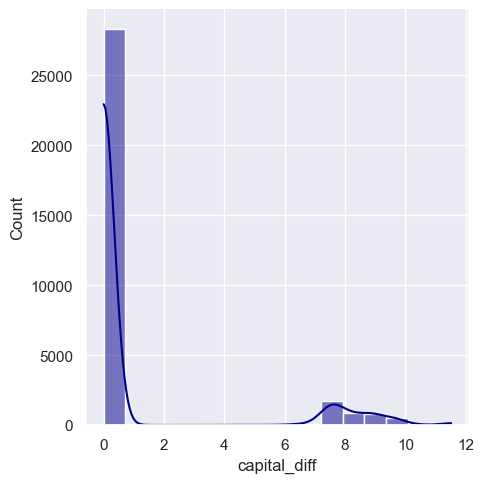

In [301]:
sns.displot(df_adult['capital_diff'], kde=True, color='darkblue')

In [302]:
df_adult.describe(include='number').round(2)

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,capital_diff
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,189778.37,6.41,0.73,0.35,40.44,1.08
std,105549.98,1.84,2.45,1.58,12.35,2.83
min,12285.00,1.00,0.00,0.00,1.00,0.00
25%,117827.00,5.00,0.00,0.00,40.00,0.00
50%,178356.00,7.00,0.00,0.00,40.00,0.00
75%,237051.00,8.00,0.00,0.00,45.00,0.00
max,1484705.00,10.00,11.51,8.38,99.00,11.51


In [303]:
df_adult.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,10,7,15,5,5,2,41,2
top,Private,Bachelors,Married-civ-spouse,Prof-specialty,Married,White,Male,United-States,<=50K
freq,22696,12646,14976,4140,14761,27816,21790,29170,24720


In [304]:
df_adult['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [305]:
df_adult['workclass'] = df_adult['workclass'].apply(lambda x: 'No Income' if x == 'Never-worked' or x == 'Without-pay' else x)
df_adult['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
No Income              21
Name: count, dtype: int64

In [306]:
df_adult['education'].unique()

array(['Bachelors', 'High School Graduation', 'Upper Secondary Education',
       'Masters', 'Lower Secondary Education', 'Associate', 'Doctorate',
       'Prof-school', 'Primary Education', 'Preschool'], dtype=object)

In [307]:
df_adult['education-num'].unique()

array([ 8,  5,  4,  9,  3,  7, 10,  6,  2,  1], dtype=int64)

In [308]:
df_adult['marital-status'].value_counts()

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [309]:
df_adult['marital-status'] = df_adult['marital-status'].apply(lambda x: 'Not Married' if x == 'Never-married' or x == 'Divorced' or x == 'Separated' or x == 'Widowed' else 'Married')
df_adult['marital-status'].value_counts()

marital-status
Not Married    17144
Married        15417
Name: count, dtype: int64

In [310]:
df_adult['occupation'].value_counts()

occupation
Prof-specialty        4140
Craft-repair          4099
Exec-managerial       4066
Adm-clerical          3770
Sales                 3650
Other-service         3295
Machine-op-inspct     2002
Unknown-Occupation    1843
Transport-moving      1597
Handlers-cleaners     1370
Farming-fishing        994
Tech-support           928
Protective-serv        649
Priv-house-serv        149
Armed-Forces             9
Name: count, dtype: int64

In [311]:
df_adult['relationship'].value_counts()

relationship
Married           14761
Not-in-family      8305
Own-child          5068
Unmarried          3446
Other-relative      981
Name: count, dtype: int64

In [312]:
df_adult['race'].value_counts()

race
White            27816
Black             3124
Asian             1039
Indian-Eskimo      311
Other              271
Name: count, dtype: int64

In [313]:
df_adult['native-country'] = df_adult['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'other')
df_adult['native-country'].value_counts()

native-country
United-States    29170
other             3391
Name: count, dtype: int64

In [314]:
df_adult['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [315]:
df_adult['income'] = df_adult['income'].apply(lambda x: 1 if x == '>50K' else 0)
df_adult['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [316]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff
0,3,State-gov,77516,Bachelors,8,Not Married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,United-States,0,7.684784
1,4,Self-emp-not-inc,83311,Bachelors,8,Married,Exec-managerial,Married,White,Male,0.000000,0.0,13,United-States,0,0.000000
2,3,Private,215646,High School Graduation,5,Not Married,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0,0.000000
3,5,Private,234721,Upper Secondary Education,4,Married,Handlers-cleaners,Married,Black,Male,0.000000,0.0,40,United-States,0,0.000000
4,2,Private,338409,Bachelors,8,Married,Prof-specialty,Married,Black,Female,0.000000,0.0,40,other,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2,Private,257302,Associate,7,Married,Tech-support,Married,White,Female,0.000000,0.0,38,United-States,0,0.000000
32557,3,Private,154374,High School Graduation,5,Married,Machine-op-inspct,Married,White,Male,0.000000,0.0,40,United-States,1,0.000000
32558,5,Private,151910,High School Graduation,5,Not Married,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,United-States,0,0.000000
32559,1,Private,201490,High School Graduation,5,Not Married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,United-States,0,0.000000


<Axes: >

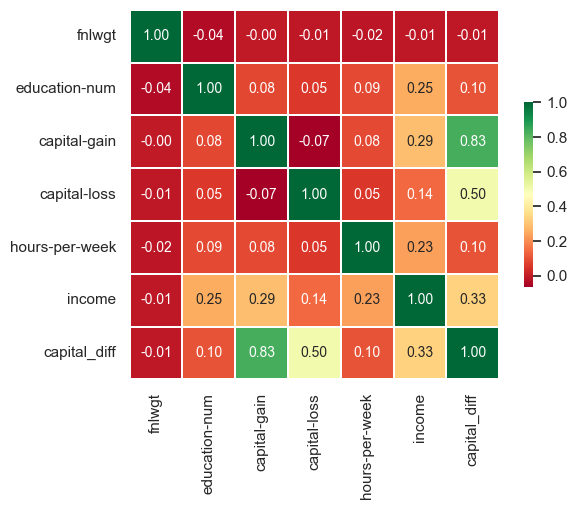

In [317]:
sns.heatmap(df_adult.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={"size": 10}, fmt=".2f", square=True, cbar_kws={"shrink": .5}) 

<Axes: xlabel='capital_diff', ylabel='income'>

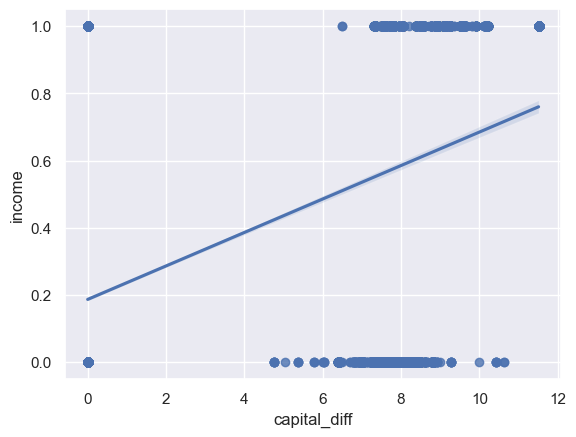

In [328]:
sns.regplot(x='capital_diff', y='income', data=df_adult)

<Axes: xlabel='capital-gain', ylabel='income'>

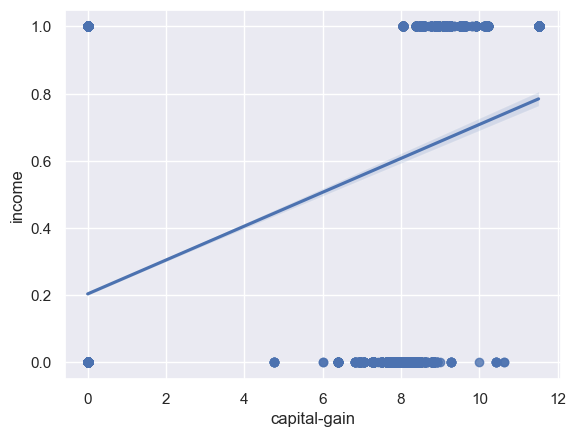

In [325]:
sns.regplot(x='capital-gain', y='income', data=df_adult)

#### Insight:
- filwgt (final weight) has no correlation with income
- Drop Education column as it is same as education-num

In [318]:
df_adult.drop('fnlwgt', axis=1, inplace=True)
df_adult.drop('education', axis=1, inplace=True)    

### Split Data

In [319]:
from sklearn.model_selection import train_test_split

X = df_adult.drop('income', axis=1)
y = df_adult['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [320]:
df_adult['sex']

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
32556    Female
32557      Male
32558    Female
32559      Male
32560    Female
Name: sex, Length: 32561, dtype: object

### Label Encoding

In [321]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = LabelEncoder()
X_train['workclass'] = encoder.fit_transform(X_train['workclass'])
X_test['workclass'] = encoder.transform(X_test['workclass'])

encoder = LabelEncoder()
X_train['marital-status'] = encoder.fit_transform(X_train['marital-status'])
X_test['marital-status'] = encoder.transform(X_test['marital-status'])

encoder = LabelEncoder()
X_train['occupation'] = encoder.fit_transform(X_train['occupation'])
X_test['occupation'] = encoder.transform(X_test['occupation'])

encoder = LabelEncoder()
X_train['relationship'] = encoder.fit_transform(X_train['relationship'])
X_test['relationship'] = encoder.transform(X_test['relationship'])

encoder = LabelEncoder()
X_train['race'] = encoder.fit_transform(X_train['race'])
X_test['race'] = encoder.transform(X_test['race'])

encoder = LabelEncoder()
X_train['sex'] = encoder.fit_transform(X_train['sex'])
X_test['sex'] = encoder.transform(X_test['sex'])

encoder = LabelEncoder()
X_train['native-country'] = encoder.fit_transform(X_train['native-country'])
X_test['native-country'] = encoder.transform(X_test['native-country'])

#### One Hot Encoding

In [322]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['occupation'])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

### Standardizing

In [323]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building Model

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

- Logistic Regression

In [330]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('accuracy score [Training Data]: ', accuracy_score(y_train, lr.predict(X_train)))
print('accuracy score [Test Data]: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score [Training Data]:  0.8402265902265902
accuracy score [Test Data]:  0.8507829290758366
[[2281  175]
 [ 311  490]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2456
           1       0.74      0.61      0.67       801

    accuracy                           0.85      3257
   macro avg       0.81      0.77      0.79      3257
weighted avg       0.84      0.85      0.85      3257



- K Nearest Neighbors

In [331]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('accuracy score [Training Data]: ', accuracy_score(y_train, knn.predict(X_train)))

print('accuracy score [Test Data]: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score [Training Data]:  0.8702907452907452
accuracy score [Test Data]:  0.8406509057414799
[[2231  225]
 [ 294  507]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2456
           1       0.69      0.63      0.66       801

    accuracy                           0.84      3257
   macro avg       0.79      0.77      0.78      3257
weighted avg       0.84      0.84      0.84      3257



- Support Vector Classifier (SVC)

In [332]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('accuracy score [Training Data]: ', accuracy_score(y_train, svm.predict(X_train)))

print('accuracy score [Test Data]: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score [Training Data]:  0.8543884793884794
accuracy score [Test Data]:  0.8575376112987412
[[2294  162]
 [ 302  499]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2456
           1       0.75      0.62      0.68       801

    accuracy                           0.86      3257
   macro avg       0.82      0.78      0.80      3257
weighted avg       0.85      0.86      0.85      3257



- Random Forest Classifier

In [335]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('accuracy score [Training Data]: ', accuracy_score(y_train, rf.predict(X_train)))

print('accuracy score [Test Data]: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score [Training Data]:  0.9383019383019383
accuracy score [Test Data]:  0.869204789683758
[[2291  165]
 [ 261  540]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2456
           1       0.77      0.67      0.72       801

    accuracy                           0.87      3257
   macro avg       0.83      0.80      0.82      3257
weighted avg       0.87      0.87      0.87      3257



### Optimization for logistic Regression model

In [336]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [337]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([
    ('classifier', LogisticRegression())
])

param_grid = [
    {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.001, 0.01, 0.02 , 0.05 ,0.1, 0.2, 0.5 , 1.0, 2.0 , 3.0, 5.0, 10.0, 15.0 , 20.0 , 100, 1000],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter': [50, 100, 150, 200]
    }
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
0.8401241153852649
{'classifier__C': 0.02, 'classifier__max_iter': 50, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}


In [338]:
model_logr = LogisticRegression(penalty='l2', C=0.02, solver='saga', max_iter=50)
model_logr.fit(X_train, y_train)

y_pred = model_logr.predict(X_test)
print('accuracy score [Training Data]: ', accuracy_score(y_train, model_logr.predict(X_train)))
print('accuracy score [Test Data]: ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy score [Training Data]:  0.8402265902265902
accuracy score [Test Data]:  0.8498618360454406
[[2283  173]
 [ 316  485]]


### Saving the model

In [339]:
from joblib import dump
dump(model_logr, 'model_logr.joblib')

#model_logr = load('model_logr.joblib')

['model_logr.joblib']

------------

-------------